# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [58]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
assert(len(X_train) == len(y_train))

assert(len(X_test) == len(y_test))


print("Image Shape: {}".format(X_train[0].shape))

print("Training Set:   {} samples".format(len(X_train)))

print("Test Set:       {} samples".format(len(X_test)))

print("Training Labels:   {} labels".format(len(y_train)))

print("Test Labels:       {} labels".format(len(y_test)))


Image Shape: (32, 32, 3)
Training Set:   39209 samples
Test Set:       12630 samples
Training Labels:   39209 labels
Test Labels:       12630 labels


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [59]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

13


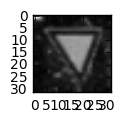

In [141]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [61]:
import cv2
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

def convert_grayscale(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return img

def process(data):
    procimgs = []
    for image in data:
        gray = convert_grayscale(image)
        procimgs.append(gray)
        
    return np.array(procimgs)

In [62]:
from numpy import newaxis 

X_train = process(X_train)
# Adding depth -1
X_train = X_train[..., newaxis]

# Normalize
X_train = normalize_grayscale(X_train)

X_test = process(X_test)
# Adding depth -1
X_test = X_test[..., newaxis]

# Normalize
X_test = normalize_grayscale(X_test)


In [63]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.


from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=37)

print(len(X_train))
print(len(X_validation))
print(len(X_train))
print(len(y_train))




31367
7842
31367
31367


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**  Looking at the traffic sign dataset, it appears that the color channels do not provide any significant advantage over gray scale. I tried converting the images to gray scale and normalized the data using Min-Max scaling that was introduced in the lessons. Here's what I did with my processing:
1. Used cv2 library to convert images to Gray scale
2. Added a new depth dimension as cv2 conversion just returns height and weight
3. Normalized the data using Min-Max scaling technique used in class
4. Converting to Gray scale and normalized just sped up the training

In [64]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**- I shuffled the input set to get randomized set of inputs. I used sklearn's train_test_split function to create a split 31367 to 7842 split between training and validation set respectively
    


In [65]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** My architecture for traffic sign classifier is LeNet architecture we used in the class. The architecture uses 2 convolutional layers and 3 fully connected layers. I also added a dropout layer to avoid overfitting. This seemed to help the overall acuracy. Since, I have a gray scaled image, I had to drop the depth to 1 (instead of 3). I also used the "Keep_prob" variable to control the amount of drop out. Used 0.5 for training set and 1.0 for Testing set. I used epochs of 10 and a batch size of 150. I tried adjusting the batch size moving it higher and lower from default size of 128. Found that I got better accuracy at 150. I also, tried to play with the fully connected layers input and output sizes.


In [66]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 150

In [67]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
        
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal((5, 5, 1, 6),mean=mu,stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID') + conv1_b

    # TODO: Activation.
   
    conv1 = tf.nn.relu(conv1)
   

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 =  tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1], padding='VALID')
   

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal((5, 5, 6, 16),mean=mu,stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 =  tf.nn.max_pool(conv2, [1,2,2,1], [1,2,2,1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = tf.contrib.layers.flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120. Experimented with multiple different values, settled for 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    # Adding Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    

    # TODO: Layer 4: Fully Connected. Input = 200. Output = 100.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(100))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    #Adding Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 100. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [68]:
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [69]:
rate = 0.005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [70]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [71]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.7})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'Save_Model\model.ckpt')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.827

EPOCH 2 ...
Validation Accuracy = 0.921

EPOCH 3 ...
Validation Accuracy = 0.953

EPOCH 4 ...
Validation Accuracy = 0.961

EPOCH 5 ...
Validation Accuracy = 0.973

EPOCH 6 ...
Validation Accuracy = 0.971

EPOCH 7 ...
Validation Accuracy = 0.978

EPOCH 8 ...
Validation Accuracy = 0.976

EPOCH 9 ...
Validation Accuracy = 0.979

EPOCH 10 ...
Validation Accuracy = 0.980

Model saved


In [72]:
with tf.Session() as sess:
    saver.restore(sess, 'Save_Model\model.ckpt')

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.9300079345703125


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**  Below are the hyperparameters I used:
1. Optimizer - Adam optimizer, just as we used in the class
2. Batch size = 150. I tried adjusting the batch size by moving it both higher and lower from the default size of 128. Found 150 to give a better accuracy.
3. Epoch = 10. If I had color images, I had to increase the number of epochs to get a better accuracy ( I tried up until 25). With gray scaled images, I could just stay with 10 and get a fairly good accuracy.
4. Mu = 0 and sigma = 0.1. I did not change these parameters.
5. Learning rate = 0.005. I arrived at this after lot of trial and error. Was training with 0.001 for a long time, but increasing the learning rate slowly helped increase the accuracy.
6. Keep_Prob, dropout rate = 0.5 (training) and 1.0 (testing)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I spent a lot of time tweaking the hyperparameters. Even though, the basic algorithm is simple enough, there seems to be lot of room for tweaking the parameters. I maintained a spreadsheet with a list of parameters and tweaked them one by one. 
- First I tried with default values. no pre processing of data, epoch of 10, batch size of 128, no drop out etc. The testing accuracy was around 0.953
- I tried to increase the epochs, but did not yield better results
- Next, I tried to increase the batch size. Tried very high batch sizes 200, 300 etc., but the accuracy was improving
- I tried to decrease the batch size, that did not help much as it was increasing the time to train
- I preprocessed the data (converted to gray scale and normalized). This helped increasing the speed of training
- Next, I tried to increase the input and output layers of the fully 3 connected layers. Increased the value slowly and finally arrived at 400, 200 for the first layer etc.,
- I did not think that increasing the learning rate is a good idea. I did not try until the very end. I thought lower the learning rate is better for training. but, as I increased the learning rate slowly from 0.001 to 0.005, I saw a very good increase in the accuracy. My test accuracy now is 0.930079


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

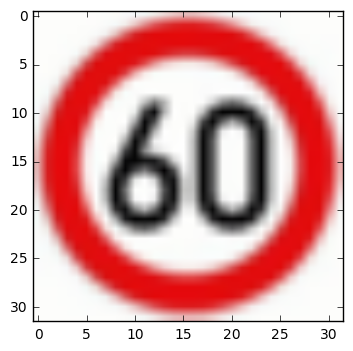

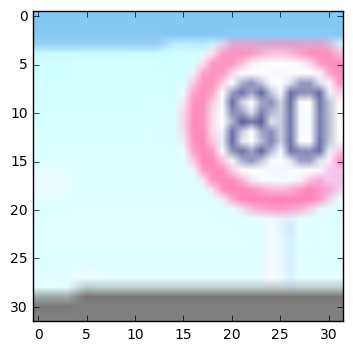

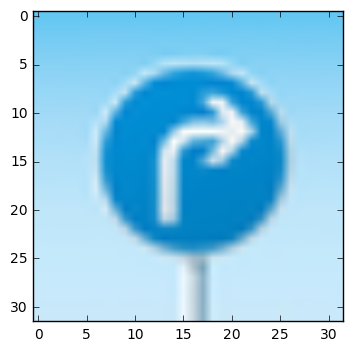

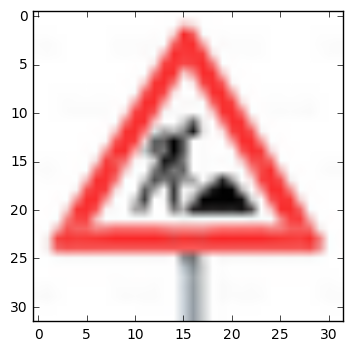

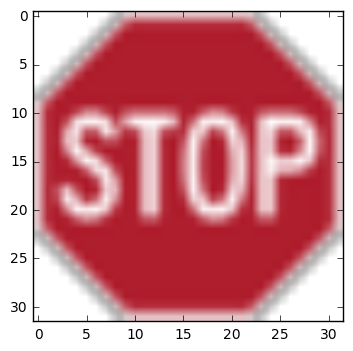

In [190]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
traffic_sign = os.listdir("New_Data/")
traffic_sign = traffic_sign[:6]

img = []

for i in traffic_sign:
    i = 'New_Data/' + i
    image = mpimg.imread(i)
    img.append(image)
    plt.imshow(image)
    plt.show()

In [191]:
from numpy import newaxis

img = process(img)

img = img[..., newaxis]
img = normalize_grayscale(img)
print(img.shape)
print(img[0].shape)



(5, 32, 32, 1)
(32, 32, 1)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I downloaded the following pictures from internet. I tried to convert the images to 32x32 and conver them to png formats. Below are the images:
1. 60 km/hr sign
2. 80 km/hr sign
3. Right turn ahead
4. Road work
5. Stop sign

At first glance, I am very hopeful that my classifier will classify all the signs. The images are low on resolution. That might pose problems for the classifier.

In [193]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
print(X_train[0].shape)
with tf.Session() as sess:
    saver.restore(sess, 'Save_Model\model.ckpt')

    classes = sess.run(logits, feed_dict={x: img, keep_prob : 1.0})
    print(classes.shape)
    output = sess.run(tf.nn.top_k(tf.constant(classes), k=5))
    for i in range(len(output[0])):
        print('Image', i, output[0][i], 'and output', output[1][i])

(32, 32, 1)
(5, 43)
Image 0 [ 1.63122296  1.07098687  0.73825884  0.39084563  0.0861747 ] and output [ 5 33  3  4 10]
Image 1 [ 1.10694551  0.71561462  0.53651589  0.12695095  0.1062435 ] and output [ 5 33  4 10  3]
Image 2 [ 1.43533468  1.12898171  0.38722521  0.38577715  0.28521743] and output [33  5  4 10  3]
Image 3 [ 2.02447796  1.15273821  0.31833372  0.28451857  0.23320602] and output [33  5 10  3  4]
Image 4 [ 1.30033028  1.03818595  0.82925159  0.26460874  0.251892  ] and output [ 5 33  3  4 10]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** I am very disappointed with results. The classifier is only able to correctly classify the 80 km/hr and right turn ahead signs ( accuracy of 40%). It was able identify the 60 km/hr but classified it with a much lower probablity. I am really surprised that the classifier could not classify the stop sign accurately. I tried with many other common images and the accuracy is very disappointing. I can only attribute this to lower quality of the images.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**  The classifier did not do a good job on the new images. I tried many different images that I downloaded from internet. Unfortunately, the accuracy wasn't good at all. In general the classifier is not certain of any of the classes.

- The first image 60 km/hr sign ( I have tried with 30 km/h, 20 kmh/hr etc.,) is wrongly classifed as 80 km/hr. The classifier does identify this image as 60 km/hr sign but with a lower probability. Correct prediction does appear in the top 5.

- The second image 80 km/hr sign is correctly classified. The classifier is very certain of this class.

- The third image right turn ahead is correctly classified. The classifier is very certain of this class.

- The fourth image road work is wrongly classified. Correct prediction does not appear in the top 5.

- The fift image, stop sign is also wrongly classifed as a speed sign. I was pretty confident that this image would get classified correctly. Correct prediction does not appead in the top 5.

I feel the bad performance might be due to variety of reasons. My images may not have the right quality, resolution, structure that was expected in the dataset etc.,

Also, the model might not have been trained adequately. Is 93% accuracy on the test data not enough. Should we try to improve the accuracy?
Some thoughts on improving the model's accuracy are 
- run for more epochs
- train purely on color images, not gray scale
- increase the test data size
- collect different images
- expand it to not just german dataset but other sets of data.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.